### Data: Data de solicitação de entrega à distribuidora
---
### Fornecedor: Nome da empresa fornecedora dos equipamentos;
---
### Destino: Estado de destiny do respirador;
---
### Estado/Municipio: Tipo de UF que será o destiny da entrega;
---
### Tipo: Tipo do equipamento;
---
### Quantidade: Unidades entregues;
---
### Valor: Valor total da entrega, em reais;
---
### Destinatario: Entidade que recebeu o bem;
---
### UF: UF de entrega;
---
### Data de Entrega: Data de entrega no destinatário.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_respirators = pd.read_csv('Arquivos/distribuicao_respiradores.csv', sep=';')
df_respirators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATA              2650 non-null   object
 1   FORNECEDOR        2650 non-null   object
 2   DESTINO           2650 non-null   object
 3   ESTADO/MUNICIPIO  2650 non-null   object
 4   TIPO              2650 non-null   object
 5   QUANTIDADE        2650 non-null   int64 
 6   VALOR             2650 non-null   object
 7   DESTINATARIO      2650 non-null   object
 8   UF                2650 non-null   object
 9   DATA DE ENTREGA   2650 non-null   object
dtypes: int64(1), object(9)
memory usage: 207.2+ KB


In [3]:
df_respirators.shape

(2650, 10)

In [4]:
df_respirators.head()

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
0,21/05/2020,VYAIRE,ACRE,ESTADO,UTI,20,"R$ 1.200.000,00",Secretaria Estadual de Saúde,AC,23/05/2020
1,21/05/2020,MAGNAMED,ACRE,ESTADO,TRANSPORTE,10,"R$ 482.900,00",Secretaria Estadual de Saúde,AC,23/05/2020
2,05/06/2020,LEISTUNG,ACRE,ESTADO,UTI,30,"R$ 1.800.000,00",Secretaria Estadual de Saúde,AC,08/06/2020
3,16/06/2020,VYAIRE,ACRE,MUNICIPIO,UTI,5,"R$ 300.000,00",Secretaria Municipal de Saúde (Sena Madureira),AC,24/06/2020
4,16/06/2020,MAGNAMED,ACRE,MUNICIPIO,TRANSPORTE,5,"R$ 241.450,00",Secretaria Municipal de Saúde (Sena Madureira),AC,24/06/2020


---

## Análises

In [5]:
df_respirators.isnull().sum()

DATA                0
FORNECEDOR          0
DESTINO             0
ESTADO/MUNICIPIO    0
TIPO                0
QUANTIDADE          0
VALOR               0
DESTINATARIO        0
UF                  0
DATA DE ENTREGA     0
dtype: int64

In [6]:
df_respirators[df_respirators['DESTINO'].str.contains('SANTA')].shape

(56, 10)

In [7]:
df_respirators['QUANTIDADE'][df_respirators['DESTINO'].str.contains('SANTA')].sum()

497

In [8]:
df_respirators['QUANTIDADE'].sum()

18672

In [9]:
df_respirators['DESTINO'].unique()

array(['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA',
       'ESPIRITO SANTO ', 'DISTRITO FEDERAL', 'GOIAS', 'MARANHÃO',
       'MINAS GERAIS', 'MATO GROSSO DO SUL', 'MATO GROSSO ', 'PARA',
       'PARAIBA', 'PERNAMBUCO', 'PIAUI', 'PARANA', 'RIO DE JANEIRO',
       'RIO GRANDE DO NORTE', 'RONDONIA', 'RORAIMA', 'RIO GRANDE DO SUL ',
       'SANTA CATARINA', 'SERGIPE', 'SÃO PAULO', 'TOCANTINS', 'LIBANO',
       'PERU', 'HAITI '], dtype=object)

In [10]:
df_respirators['UF'].unique()

array(['AC', 'AC ', 'AL', 'AL ', 'AP', 'AM', 'BA', 'CE', 'ES', 'DF', 'GO',
       'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
       'RN ', 'RO ', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', '-'],
      dtype=object)

In [11]:
df_respirators['TIPO'].unique()

array(['UTI', 'TRANSPORTE', 'TRANSPORTE USA', 'Transporte USA'],
      dtype=object)

In [12]:
df_respirators['ESTADO/MUNICIPIO'].unique()

array(['ESTADO', 'MUNICIPIO', 'ESTADO ', '-'], dtype=object)

In [13]:
df_respirators['FORNECEDOR'].unique()

array(['VYAIRE', 'MAGNAMED', 'LEISTUNG', 'KTK', 'LIFEMED ',
       'MAGNAMED-REQUISIÇÃO', 'L C DADDE COM AT INST MAT MEDICO EPP',
       'LIFEMED', 'SUZANO/Zhongxun Medical', 'SUZANO/Resmed', 'WEG',
       'VYAIRE LTV 2200 USA', 'LEISTUNG ', 'VYAIRE ', 'HORTRON ',
       'MAGNAMED/REQUISIÇÃO', 'INSPIRAR', 'INSPIRAR ', 'UTI',
       'RUSSER BRASIL', 'RUSSER', 'HORTRON', 'VYAIRE LTV 1200 USA',
       'LEISTUNG/VYAIRE', 'KTK/VAYIRE', 'VYAIRE/INTERMED', 'ALLIAGE '],
      dtype=object)

#### Estados são retratados '-', por causa que são outros paises, não tendo info do UF

In [14]:
df_respirators.tail(6)

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
2644,19/03/2021,INSPIRAR,TOCANTINS,MUNICIPIO,UTI,2,"R$ 120.000,00",SMS de Formoso do Araguaia,TO,23/03/2021
2645,07/08/2020,MAGNAMED,LIBANO,-,TRANSPORTE,300,"R$ 14.487.000,00",MISSÃO FAB (Doação Destino ao Libano).,-,08/08/2020
2646,29/12/2020,MAGNAMED,PERU,-,UTI,100,"R$ 6.000.000,00",Cooperação Humanitária (Peru),-,28/12/2020
2647,29/12/2020,KTK,PERU,-,TRANSPORTE,230,"R$ 4.600.000,00",Cooperação Humanitária (Peru),-,28/12/2020
2648,08/01/2021,KTK,HAITI,-,TRANSPORTE,50,"R$ 1.000.000,00",Cooperação Humanitária (HAITI),-,12/01/2021
2649,08/01/2021,MAGNAMED,HAITI,-,UTI,50,"R$ 3.000.000,00",Cooperação Humanitária (HAITI),-,12/01/2021


## Tratamentos

In [15]:
df_respirators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATA              2650 non-null   object
 1   FORNECEDOR        2650 non-null   object
 2   DESTINO           2650 non-null   object
 3   ESTADO/MUNICIPIO  2650 non-null   object
 4   TIPO              2650 non-null   object
 5   QUANTIDADE        2650 non-null   int64 
 6   VALOR             2650 non-null   object
 7   DESTINATARIO      2650 non-null   object
 8   UF                2650 non-null   object
 9   DATA DE ENTREGA   2650 non-null   object
dtypes: int64(1), object(9)
memory usage: 207.2+ KB


In [16]:
df_respirators['UF'] = df_respirators['UF'].str.strip()
df_respirators['DESTINO'] = df_respirators['DESTINO'].str.rstrip().apply(lambda x: x.title())
df_respirators['ESTADO/MUNICIPIO'] = df_respirators['ESTADO/MUNICIPIO'].str.rstrip()
df_respirators['TIPO'] = df_respirators['TIPO'].str.upper()
df_respirators['FORNECEDOR'] = df_respirators['FORNECEDOR'].str.rstrip().apply(lambda x: x.replace("-", "/"))

df_respirators.rename(columns={'VALOR': 'VALOR/R$'}, inplace = True)
df_respirators['VALOR/R$'] = df_respirators['VALOR/R$'].apply(lambda x: x.replace("R$ ", ""))
df_respirators['VALOR/R$'] = df_respirators['VALOR/R$'].apply(lambda x: x.replace(".", ""))
df_respirators['VALOR/R$'] = df_respirators['VALOR/R$'].apply(lambda x: float(x.replace(",", ".")))

df_respirators.drop(df_respirators.index[448], inplace=True)

#### Identificado pela coluna Data

In [17]:
df_respirators['DATA DE ENTREGA'].replace(to_replace = '21/04/20201', value = '21/04/2021', inplace=True)

---

In [18]:
df_respirators['DATA DE ENTREGA'].replace(to_replace = '31/04/2020', value = '01/05/2020', inplace=True)
df_respirators['DATA DE ENTREGA'].replace(to_replace = '29/02/2021', value = '01/03/2021', inplace=True)
df_respirators['DATA DE ENTREGA'].replace(to_replace = '30/10//2020', value = '30/10/2020', inplace=True)
df_respirators['DATA DE ENTREGA'] = df_respirators['DATA DE ENTREGA'].str.replace('-', '')

In [19]:
df_respirators[df_respirators['DATA DE ENTREGA'].str.contains('-')]

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR/R$,DESTINATARIO,UF,DATA DE ENTREGA


In [20]:
df_respirators[df_respirators['DATA'].str.contains('-')]

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR/R$,DESTINATARIO,UF,DATA DE ENTREGA


---

#### Verificações

In [21]:
df_respirators.iloc[[91, 92, 93]]

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR/R$,DESTINATARIO,UF,DATA DE ENTREGA
91,25/01/2021 00:00,VYAIRE,Amazonas,ESTADO,UTI,40,2400000.0,SECRETARIA ESTADUAL DE SAÚDE DO AMAZONAS,AM,27/01/2021 18:00
92,03/02/2021,VYAIRE,Amazonas,ESTADO,UTI,50,3000000.0,SECRETARIA ESTADUAL DE SAÚDE DO AMAZONAS,AM,04/02/2021
93,05/02/2021,VYAIRE,Amazonas,MUNICIPIO,UTI,4,240000.0,HOSPITAL GERAL ERALDO NEVES FALCAO,AM,09/02/2021


In [22]:
df_respirators[df_respirators['DATA DE ENTREGA'].isnull() == True]

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR/R$,DESTINATARIO,UF,DATA DE ENTREGA


In [23]:
df_respirators[df_respirators['DATA'].isnull() == True]

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR/R$,DESTINATARIO,UF,DATA DE ENTREGA


---

#### Datetime

In [24]:
df_respirators[['DATA', 'DATA DE ENTREGA']] = df_respirators[['DATA', 'DATA DE ENTREGA']].apply(pd.to_datetime)

In [25]:
df_respirators.iloc[1864:1883]

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR/R$,DESTINATARIO,UF,DATA DE ENTREGA
1865,2020-11-26,LEISTUNG,Rio De Janeiro,ESTADO,UTI,19,1140000.00,INSTITUTO NACIONAL DO CANCER INCA,RJ,2020-01-12 11:15:00
1866,2020-11-26,LEISTUNG,Rio De Janeiro,ESTADO,UTI,21,1260000.00,Instituto Fernandes Figueira,RJ,2020-01-12 11:40:00
1867,2020-11-26,VYAIRE,Rio De Janeiro,ESTADO,UTI,4,240000.00,Hospital Federal de Ipanema,RJ,2020-11-30 15:29:00
1868,2020-11-26,VYAIRE LTV 2200 USA,Rio De Janeiro,ESTADO,TRANSPORTE USA,30,1893779.10,INI Instituto nacional de Infectologia,RJ,2020-11-30 11:43:00
1869,2020-11-26,LEISTUNG,Rio De Janeiro,ESTADO,UTI,10,600000.00,INI Instituto nacional de Infectologia,RJ,2020-11-30 11:43:00
1870,2020-11-26,VYAIRE,Rio De Janeiro,ESTADO,UTI,50,3000000.00,Hospital Federal do Andarai,RJ,2020-11-30 14:59:00
1871,2020-11-26,VYAIRE,Rio De Janeiro,ESTADO,UTI,10,600000.00,Hospital Geral de Bonsucesso,RJ,2020-11-30 14:58:00
1872,2020-11-26,VYAIRE,Rio De Janeiro,ESTADO,UTI,44,2640000.00,Hospital dos Servidores do Estado,RJ,2020-11-30 13:27:00
1873,2020-11-26,LEISTUNG,Rio De Janeiro,ESTADO,UTI,37,2220000.00,Instituto Nacional de Cardiologia INC,RJ,2020-01-12 14:20:00
1874,2020-11-26,VYAIRE,Rio De Janeiro,ESTADO,UTI,8,480000.00,Hospital Federal da Lagoa,RJ,2020-11-30 15:24:00


#### Remoção de datas e estados inconsistentes

In [26]:
df_respirators.drop(df_respirators[df_respirators['DATA'] > df_respirators['DATA DE ENTREGA']].index,
                     inplace=True)

df_respirators.drop(df_respirators[df_respirators['ESTADO/MUNICIPIO'] == '-'].index, inplace=True)

In [27]:
df_respirators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 2644
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA              1880 non-null   datetime64[ns]
 1   FORNECEDOR        1880 non-null   object        
 2   DESTINO           1880 non-null   object        
 3   ESTADO/MUNICIPIO  1880 non-null   object        
 4   TIPO              1880 non-null   object        
 5   QUANTIDADE        1880 non-null   int64         
 6   VALOR/R$          1880 non-null   float64       
 7   DESTINATARIO      1880 non-null   object        
 8   UF                1880 non-null   object        
 9   DATA DE ENTREGA   1880 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 161.6+ KB


In [28]:
df_respirators.shape

(1880, 10)

---

#### Verificação: se o destino for diferente de seu estado

In [29]:
destiny = list(df_respirators['DESTINO'].unique())
state = list(df_respirators['UF'].unique())

for i in range(0, int(len(df_respirators['DESTINO'].unique()))):
    print(df_respirators[(df_respirators['DESTINO'] == destiny[i]) & (df_respirators['UF'] != state[i])])

Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
Index: []
Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
Index: []
Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
Index: []
Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
Index: []
Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
Index: []
Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
Index: []
Empty DataFrame
Columns: [DATA, FORNECEDOR, DESTINO, ESTADO/MUNICIPIO, TIPO, QUANTIDADE, VALOR/R$, DESTINATARIO, UF, DATA DE ENTREGA]
In

___

## Tratamento de Outliers

In [30]:
df_respirators['ESPERA/DIA'] = (df_respirators['DATA'] - df_respirators['DATA DE ENTREGA']) * (-1)
df_respirators['ESPERA/DIA'] = df_respirators['ESPERA/DIA'].dt.days.astype('int64')

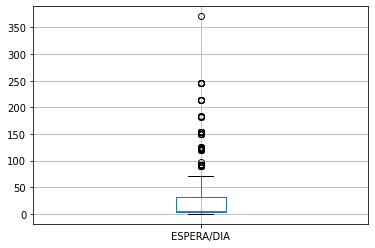

In [31]:
df_respirators.boxplot(column=['ESPERA/DIA']);

In [32]:
df_respirators.shape

(1880, 11)

In [33]:
q3 = df_respirators['ESPERA/DIA'].quantile(.75)
q1 = df_respirators['ESPERA/DIA'].quantile(.25)
qdifferent = q3 - q1
upper_limit = q3 + 1.5 * qdifferent
inferior_limit = q1 - 1.5 * qdifferent

In [34]:
df_trated = df_respirators[(df_respirators['ESPERA/DIA'] <= upper_limit) & (df_respirators['ESPERA/DIA'] >= inferior_limit)]

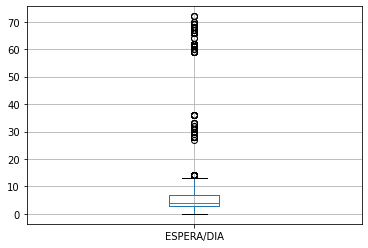

In [35]:
df_trated.boxplot(column=['ESPERA/DIA']);

In [36]:
df_trated.shape

(1610, 11)

---

### Salvando dataset tratado

In [37]:
df_trated.to_csv('Arquivos/trated.csv', index=None)

---